In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_data = []
y_data = []
max_len = 1505
audio_files = [f'web_parts/output{i}.wav' for i in range(1000)]
for i, file in enumerate(audio_files):
    # Загрузка аудиофайла
    audio, sr = librosa.load(file)

    # Извлечение MFCC коэффициентов
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)

    if mfccs.shape[1] < max_len:
        pad_width = max_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]

    tmp = np.array(mfccs)

    # Добавление MFCC коэффициентов и метки класса к X_data и y_data соответственно
    X_data.append(mfccs)
    y_data.append(1)

audio_files = [f'short_audio/output_segment_{i}.wav' for i in range(1000)]
for i, file in enumerate(audio_files):

    audio, sr = librosa.load(file)

    # Извлечение MFCC коэффициентов
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    '''[[-565.919, -564.288, ..., -426.484, -434.668],
       [  10.305,   12.509, ...,   88.43 ,   90.12 ],
       ...,
       [   2.807,    2.068, ...,   -6.725,   -5.159],
       [   2.822,    2.244, ...,   -6.198,   -6.177]]'''

    if mfccs.shape[1] < max_len:
        pad_width = max_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]
    # Добавление MFCC коэффициентов и метки класса к X_data и y_data соответственно

    X_data.append(mfccs)
    y_data.append(0)


In [3]:
tmp

array([[-4.5820572e+02, -3.1528940e+02, -2.1709222e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.8972515e+01,  1.1986711e+02,  1.3622342e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.7049866e+01,  6.1103203e+01,  5.9891712e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 5.1665125e+00,  2.5568455e-02, -9.2937546e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.0611448e+00, -2.7179575e+00, -1.1413059e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.7745756e-01,  3.5744126e+00, -2.7405617e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [4]:
tmp.shape

(20, 1505)

# Преобразование списков в массивы numpy

In [5]:
X_data

[array([[-5.2489569e+02, -5.2404431e+02, -4.9790009e+02, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  1.1817375e-01,  2.1795757e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -1.1804903e+00,  1.2628607e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00,  1.1719911e+00, -5.1705866e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  2.3210362e-01,  1.8212788e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -1.1201116e+00, -9.1986237e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 array([[-418.96414  , -255.77861  , -197.62141  , ...,    0.       ,
            0.       ,    0.       ],
        [  48.81032  ,   -3.547973 ,  -43.577995 , ...,    0.       ,
            0.       ,    0.       ],
        [   3.925836 ,   -0.671914

In [6]:
X_data = np.array(X_data)  # X_data.shape = [2000, 20, 1505]
X_data_2d = X_data.reshape(X_data.shape[0], X_data.shape[1] * X_data.shape[2])
y_data = np.array(y_data)  # y_data.shape = [2000,]
np.savetxt('X_data_2d.csv', X_data_2d, delimiter=',')
np.savetxt('y_data.csv', y_data, delimiter=',')
np.save('X_data.npy', X_data)

In [7]:
X_data_2d

array([[-524.8957 , -524.0443 , -497.9001 , ...,    0.     ,    0.     ,
           0.     ],
       [-418.96414, -255.77861, -197.62141, ...,    0.     ,    0.     ,
           0.     ],
       [-404.18964, -243.261  , -177.12311, ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [-189.71492, -163.74225, -161.22101, ...,    0.     ,    0.     ,
           0.     ],
       [-324.24203, -285.52658, -277.9156 , ...,    0.     ,    0.     ,
           0.     ],
       [-539.0346 , -536.1846 , -536.70135, ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

# Чтение файлов

In [8]:
import pandas as pd
X_data = pd.read_csv('X_data_2d.csv', delimiter=',', header=None)
y_data = pd.read_csv('y_data.csv', delimiter=',', header=None)

In [9]:
X_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099
0,-524.895691,-524.044312,-497.900085,-415.124115,-384.109558,-308.228973,-156.351669,-111.610237,-140.404221,-198.731979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-418.964142,-255.778610,-197.621414,-210.921402,-286.128021,-432.332642,-308.852356,-130.747864,-79.739250,-72.440208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-404.189636,-243.261002,-177.123108,-156.080750,-152.920532,-120.587135,-76.155197,-80.095985,-129.446335,-149.729797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-499.050690,-496.084503,-337.264069,-170.440338,-121.211586,-128.567322,-113.376900,-102.172523,-95.681465,-103.132027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-497.306580,-231.746307,-114.167480,-87.530388,-106.409279,-168.959976,-309.684357,-231.127548,-212.562576,-205.295746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_data.shape

(2000, 30100)

In [11]:
y_data.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [12]:
y_data.describe()

,0
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [13]:
y_data.shape

(2000, 1)

# Подключение нейросети

In [14]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, TimeDistributed, LSTM, Conv2D, Dropout
from keras import Input
import matplotlib.pyplot as plt

In [15]:
model = Sequential()

model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_data, y_data, epochs=50, batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.4936 - loss: 0.6985
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5513 - loss: 0.6848
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5754 - loss: 0.6798
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7074 - loss: 0.5824
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9958 - loss: 0.2878
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9970 - loss: 0.1065
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9967 - loss: 0.0412
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9942 - loss: 0.0367
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9969 - loss: 0.0229
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9941 - loss: 0.0346
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9968 - loss: 0.0238
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy:

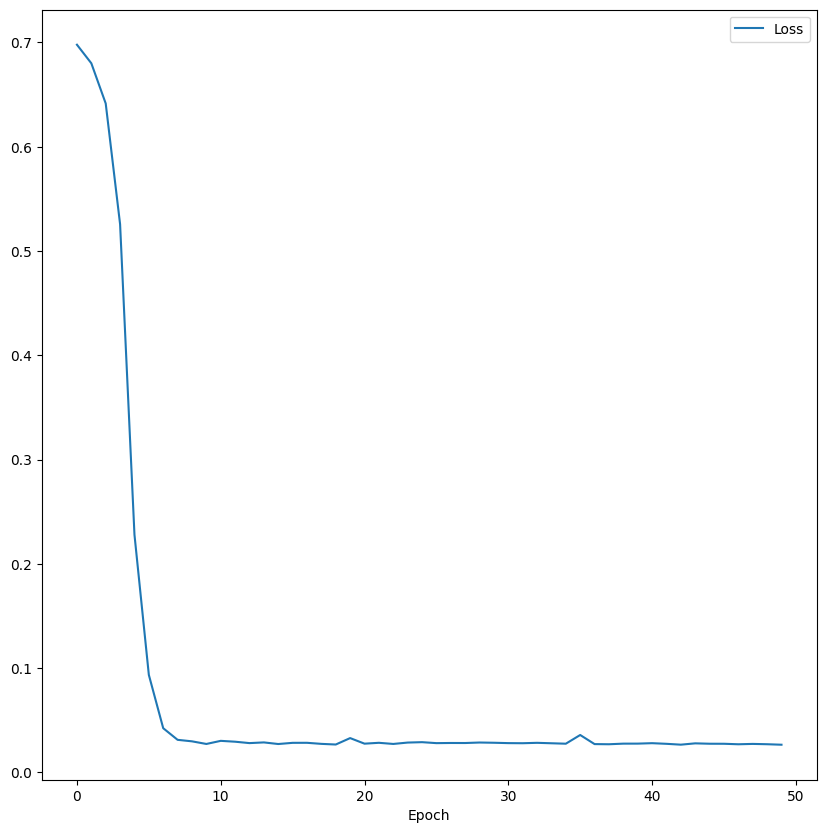

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

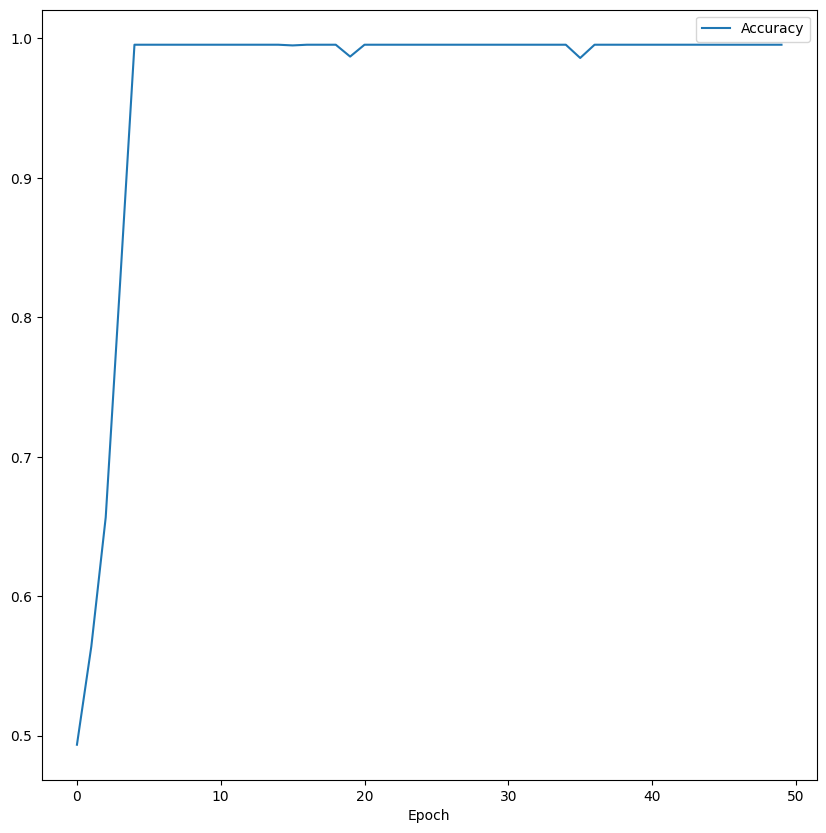

In [17]:
plt.figure(figsize=(10, 10))

plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Проверка на тестовых данных

In [18]:
def test_on_filepath(path):
    global max_len, model
    X = []
    audio, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    if mfccs.shape[1] < max_len:
        pad_width = max_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    X.append(mfccs)

    X_arr = np.array(X)
    X_2d = X_arr.reshape(X_arr.shape[0], X_arr.shape[1] * X_arr.shape[2])

    return model.predict(X_2d)

In [19]:
file_true_path = 'short_audio/output_segment_2395.wav'
file_false_path = 'web_parts/output1542.wav'

X_arr = []

audio, sr = librosa.load(file_true_path)
X_true = librosa.feature.mfcc(y=audio, sr=sr)
pad_width = max_len - X_true.shape[1]
X_true = np.pad(X_true, pad_width=((0, 0), (0, pad_width)), mode='constant')
X_arr.append(X_true)

audio, sr = librosa.load(file_false_path)
X_false = librosa.feature.mfcc(y=audio, sr=sr)
pad_width = max_len - X_false.shape[1]
X_false = np.pad(X_false, pad_width=((0, 0), (0, pad_width)), mode='constant')
X_arr.append(X_false)

X = np.array(X_arr)
X_res = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
y = np.array([0, 1])

X.shape

(2, 20, 1505)

In [20]:
y.shape

(2,)

In [21]:
X_res.shape

(2, 30100)

In [22]:
results = model.evaluate(X_res, y, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.0023


In [23]:
file_true_path = 'short_audio/output_segment_2400.wav'

X_test_arr = []

audio, sr = librosa.load(file_true_path)
mfccs = librosa.feature.mfcc(y=audio, sr=sr)
if mfccs.shape[1] < max_len:
    pad_width = max_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
X_test_arr.append(X_true)

X_val = np.array(X_test_arr)
X_val.shape

(1, 20, 1505)

In [24]:
X_res2 = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])

X_res2.shape

(1, 30100)

In [25]:
predicted = model.predict(X_res2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [26]:
predicted

array([[0.00030061]], dtype=float32)

In [27]:
predicted.shape

(1, 1)

In [28]:
predicted[0]

array([0.00030061], dtype=float32)

In [29]:
predicted[0][0]

0.0003006101

# Еще одна проверка

In [30]:
prediction1 = test_on_filepath('parts/out00.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [31]:
prediction1

array([[0.99579376]], dtype=float32)

# Сохранение модели

In [32]:
model.save('voice_model1.keras')